In [1]:
%matplotlib inline

In [2]:
import os
import json
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import wandb

#### Edit the cell below with desired values for plotting

In [3]:
X_LIM = (0, 150)
Y_LIM = (0, 1200)
ERROR_BAR = 'se'
SMOOTH = 10
WANDB_ENTITY = 'odiamond18'

In [4]:
# Get data for my code
api = wandb.Api(timeout=40)
run_dfs = []
i = 0

sweep = api.sweep(WANDB_ENTITY + "/" + 'aux_task_discovery' + "/" + 'wu1usmqz')
sweep_runs = sweep.runs
for run in sweep_runs:
    print(f'run_{i}')
    i += 1
    run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
    run_data['algo'] = 'hallway'
    run_data['code'] = 'my_code'
    run_data.dropna(inplace=True)
    run_dfs.append(run_data)

sweep = api.sweep(WANDB_ENTITY + "/" + 'aux_task_discovery' + "/" + 'wvq9xpks')
sweep_runs = sweep.runs
for run in sweep_runs:
    print(f'run_{i}')
    i += 1
    run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
    run_data['algo'] = 'corner'
    run_data['code'] = 'my_code'
    run_data.dropna(inplace=True)
    run_dfs.append(run_data)

sweep = api.sweep(WANDB_ENTITY + "/" + 'aux_task_discovery' + "/" + 'yriz8rpz')
sweep_runs = sweep.runs
for run in sweep_runs:
    print(f'run_{i}')
    i += 1
    run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
    run_data['algo'] = 'dqn'
    run_data['code'] = 'my_code'
    run_data.dropna(inplace=True)
    run_dfs.append(run_data)

sweep = api.sweep(WANDB_ENTITY + "/" + 'aux_task_discovery' + "/" + 'ovos9ur2')
sweep_runs = sweep.runs
for run in sweep_runs:
    print(f'run_{i}')
    i += 1
    run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
    run_data['algo'] = 'random-tasks'
    run_data['code'] = 'my_code'
    run_data.dropna(inplace=True)
    run_dfs.append(run_data)

sweep = api.sweep(WANDB_ENTITY + "/" + 'aux_task_discovery' + "/" + '4gm5nbom')
sweep_runs = sweep.runs
for run in sweep_runs:
    print(f'run_{i}')
    i += 1
    run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
    run_data['algo'] = 'gen-and-test'
    run_data['code'] = 'my_code'
    run_data.dropna(inplace=True)
    run_dfs.append(run_data)

runs = api.runs(WANDB_ENTITY + '/' + 'og_aux_task_codebase')
for run in runs:
    if run.config['exp_id'] == "dqn_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'dqn'
        run_data['code'] = 'paper_code'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "hallway_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'hallway'
        run_data['code'] = 'paper_code'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "corner_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'corner'
        run_data['code'] = 'paper_code'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "gentest_30_seed_no_weight_reset":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'gen-and-test'
        run_data['code'] = 'paper_code'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "gentest_30_seed_fixed_random":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'random-tasks'
        run_data['code'] = 'paper_code'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

if len(run_dfs) != 300:
    print('warning total runs is not 300')

run_0
run_1
run_2
run_3


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=40 sec). Create a new API with an integer timeout larger than 40, e.g., `api = wandb.Api(timeout=50)` to increase the graphql timeout.


run_4


KeyboardInterrupt: 

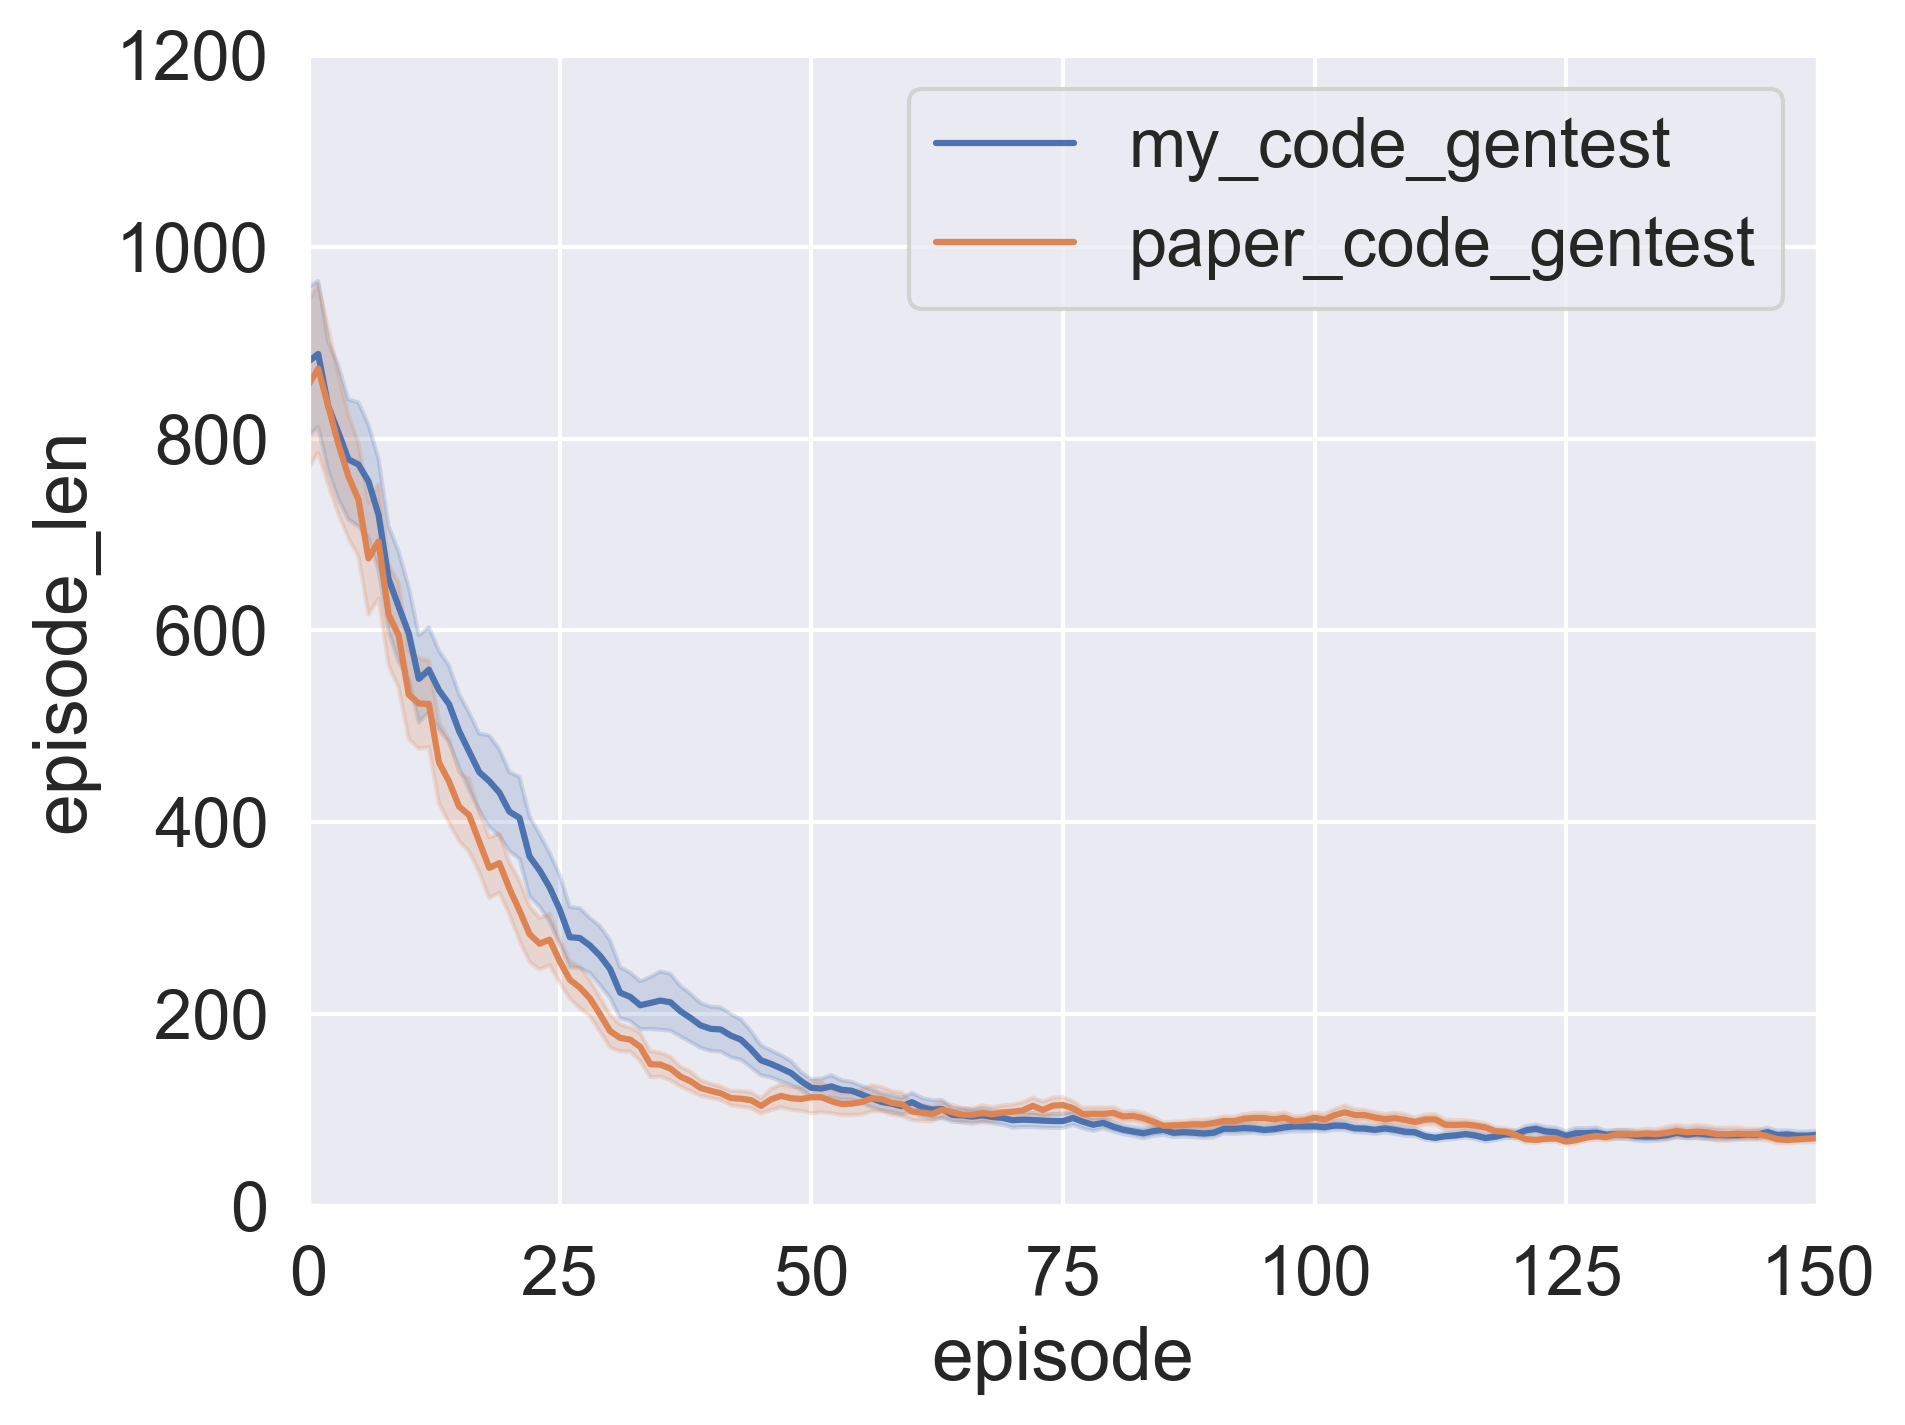

In [ ]:
new_dfs = copy.deepcopy(run_dfs)
for df in new_dfs:
    df['episode_len'] = df['episode_len'].rolling(window=SMOOTH, min_periods=1, center=True).mean()
stacked_df = pd.concat(new_dfs, axis=0, ignore_index=True)
# Plot learning curves for each level of the condition, averaging y values for each timestep across runs with the same level
sns.set_theme(style="darkgrid", font_scale=1.5, rc={"figure.dpi":300, 'savefig.dpi':300})
sns.lineplot(x='episode', 
             y='episode_len', 
             hue='algo', 
             style='code', 
             palette={
                 'corner': '#4c72b0', 
                 'hallway': '#dd8452',
                 'dqn': '#55a868',
                 'random-tasks': '#c44e52',
                 'gen-and-test': '#8172b3'
                 }, 
             data=stacked_df, 
             errorbar=ERROR_BAR)
plt.xlim(*X_LIM)
plt.ylim(*Y_LIM)
plt.legend(loc='best').set_draggable(True)

plt.tight_layout(pad=0.5)
plt.show()